<a href="https://colab.research.google.com/github/YogoBog/sudokuML/blob/main/sudoku_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install py-sudoku

In [ ]:
pip install numpy

In [ ]:
pip install matplotlib

In [ ]:
import numpy as np
from hashlib import sha256
import matplotlib.pyplot as plt

In [ ]:
from sudoku import Sudoku


In [ ]:
def show_board(board):
    table = ''
    height = len(board)//3
    width = len(board[0])//3
    size = height*width
    cell_length = len(str(size))
    _empty_cell_value = None
    format_int = '{0:0' + str(cell_length) + 'd}'
    for i, row in enumerate(board):
        if i == 0:
            table += ('+-' + '-' * (cell_length + 1) *
                      width) * height + '+' + '\n'
        table += (('| ' + '{} ' * width) * height + '|').format(*[format_int.format(
            x) if x != _empty_cell_value else ' ' * cell_length for x in row]) + '\n'
        if i == size - 1 or i % height == height - 1:
            table += ('+-' + '-' * (cell_length + 1) *
                      width) * height + '+' + '\n'
    print(table)

In [ ]:
def group_invalid(group):
    group = [i for i in group if i is not None]
    if min(group) < 1 or max(group) > 9 or len(set(group)) != len(group):
        return True
    return False

In [ ]:
def break_board_to_squares(board):
    squares = []
    np_board = np.array(board)
    prev_idx = 0
    for idx in (3,6,9):
        prev_idy = 0
        for idy in (3,6,9):
            squares.append(np_board[prev_idx:idx, prev_idy:idy])
            prev_idy = idy
        prev_idx = idx
    return squares

In [ ]:
def validate(board):
    for structure in (board, np.transpose(board)):
        for line in structure:
            if group_invalid(line):
                return False
    for square in break_board_to_squares(board):
      if group_invalid(square.flatten()):
        return False
    return True

In [ ]:
def check_win(board):
    return None not in np.array(board).flatten() and validate(board)

In [ ]:
class move():
    def __init__(self, row, column, value):
        self.row = row
        self.column = column
        self.value = value

In [ ]:

def get_next_moves(board):
    moves = []
    for idx, i in enumerate(board):
        for jdx, j in enumerate(i):
            if j is None:
                for value in range(1,10):
                    moves.append(move(idx,jdx,value))
    return moves

In [ ]:
from copy import deepcopy

def get_board_string(board):
    return str(np.array(board).flatten())

def possible_moves(board):
    moves = get_next_moves(board)
    results = []
    if moves:
        for move in moves:
            this_board = deepcopy(board)
            this_board[move.row][move.column] = move.value
            if validate(this_board):
              board_string = get_board_string(this_board)
              results.append((board_string, this_board))
    return results

In [ ]:
def brute_force(start):
    visited = set()
    board_string = get_board_string(start)
    stack = [start]
    stack_set = set()
    stack_set.add(board_string)
    stack_len = []
    idx = 0
    while stack:
        vertex = stack.pop()
        board_string = get_board_string(vertex)
        if check_win(vertex):
            print('solved')
            show_board(vertex)
            return vertex, stack_len
        if board_string not in visited:
            visited.add(board_string)
            moves = possible_moves(vertex)
            stack.extend([i[1] for i in moves if i[0] not in stack_set and i[0] not in visited])
            stack_set.update([i[0] for i in moves])
            stack_len.append(len(stack))
        if idx % 1000 == 0:
            print(idx, len(visited))
        idx+=1
    return "no possible solution", stack_len

In [ ]:
puzzle_easy = Sudoku(3).difficulty(0.05)
show_board(puzzle_easy.board)


+-------+-------+-------+
| 2 5 1 | 6 4   | 7 3 8 |
| 7 4 6 | 3 5 8 | 9 2   |
| 9 8 3 | 2 7   | 4 5 6 |
+-------+-------+-------+
| 1 7 5 | 9 6 2 | 8 4 3 |
| 3 6 4 | 8 1 5 | 2 7 9 |
| 8 2   | 7 3 4 | 1 6 5 |
+-------+-------+-------+
| 5 1 7 | 4 8 3 | 6 9 2 |
| 6 3 2 | 1 9 7 | 5 8 4 |
| 4 9 8 | 5 2 6 | 3 1 7 |
+-------+-------+-------+



In [ ]:
puzzle_medium = Sudoku(3).difficulty(0.15)
show_board(puzzle_medium.board)

+-------+-------+-------+
| 2 5 1 | 6 4   | 7 3 8 |
| 7 4 6 | 3 5 8 | 9 2   |
| 9 8 3 | 2 7   | 4 5 6 |
+-------+-------+-------+
|   7 5 |   6 2 | 8 4 3 |
| 3   4 |   1 5 | 2 7 9 |
| 8 2   | 7 3   | 1 6 5 |
+-------+-------+-------+
| 5 1 7 | 4 8   | 6 9 2 |
| 6 3 2 | 1   7 | 5 8 4 |
| 4 9 8 |   2 6 | 3 1 7 |
+-------+-------+-------+



In [ ]:
puzzle_hard = Sudoku(3).difficulty(0.25)
show_board(puzzle_hard.board)

+-------+-------+-------+
| 2 5 1 | 6 4   | 7 3   |
| 7   6 | 3 5 8 |   2   |
| 9 8 3 | 2 7   | 4 5 6 |
+-------+-------+-------+
|   7 5 |   6 2 | 8 4 3 |
| 3   4 |   1 5 |   7   |
| 8 2   | 7 3   | 1 6 5 |
+-------+-------+-------+
| 5   7 | 4 8   | 6 9 2 |
| 6   2 | 1     | 5 8 4 |
| 4 9 8 |   2 6 | 3 1 7 |
+-------+-------+-------+



In [ ]:
puzzle_veryhard = Sudoku(3).difficulty(0.3)
show_board(puzzle_veryhard.board)

+-------+-------+-------+
| 2 5 1 | 6 4   | 7 3   |
| 7     | 3 5 8 |   2   |
| 9 8 3 | 2 7   | 4 5 6 |
+-------+-------+-------+
|   7 5 |   6 2 | 8 4 3 |
| 3   4 |   1 5 |   7   |
| 8 2   | 7 3   | 1 6   |
+-------+-------+-------+
| 5   7 | 4 8   | 6 9   |
| 6   2 |       | 5 8 4 |
| 4 9 8 |   2 6 | 3 1 7 |
+-------+-------+-------+



0 1
solved
+-------+-------+-------+
| 2 5 1 | 6 4 9 | 7 3 8 |
| 7 4 6 | 3 5 8 | 9 2 1 |
| 9 8 3 | 2 7 1 | 4 5 6 |
+-------+-------+-------+
| 1 7 5 | 9 6 2 | 8 4 3 |
| 3 6 4 | 8 1 5 | 2 7 9 |
| 8 2 9 | 7 3 4 | 1 6 5 |
+-------+-------+-------+
| 5 1 7 | 4 8 3 | 6 9 2 |
| 6 3 2 | 1 9 7 | 5 8 4 |
| 4 9 8 | 5 2 6 | 3 1 7 |
+-------+-------+-------+



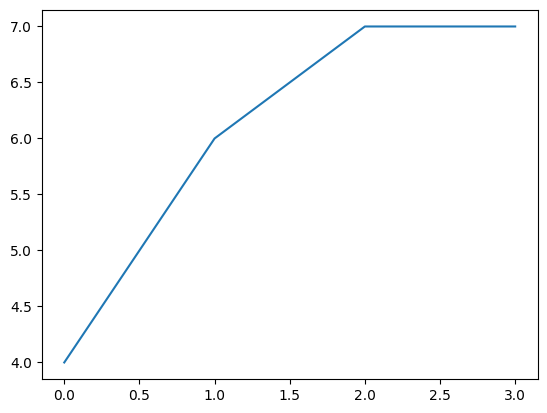

In [ ]:
solved, runs = brute_force(puzzle_easy.board)
plt.plot([i for i in range(len(runs))], runs)
plt.show()

0 1
solved
+-------+-------+-------+
| 2 5 1 | 6 4 9 | 7 3 8 |
| 7 4 6 | 3 5 8 | 9 2 1 |
| 9 8 3 | 2 7 1 | 4 5 6 |
+-------+-------+-------+
| 1 7 5 | 9 6 2 | 8 4 3 |
| 3 6 4 | 8 1 5 | 2 7 9 |
| 8 2 9 | 7 3 4 | 1 6 5 |
+-------+-------+-------+
| 5 1 7 | 4 8 3 | 6 9 2 |
| 6 3 2 | 1 9 7 | 5 8 4 |
| 4 9 8 | 5 2 6 | 3 1 7 |
+-------+-------+-------+



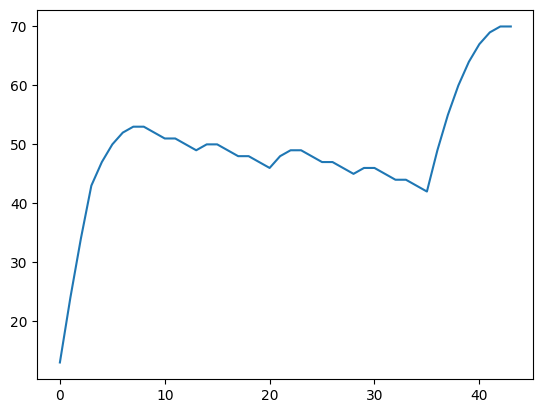

In [ ]:
solved, runs = brute_force(puzzle_medium.board)
plt.plot([i for i in range(len(runs))], runs)
plt.show()

0 1
solved
+-------+-------+-------+
| 2 7 8 | 4 6 1 | 5 9 3 |
| 6 4 9 | 7 5 3 | 2 1 8 |
| 1 3 5 | 8 9 2 | 4 6 7 |
+-------+-------+-------+
| 9 5 1 | 2 8 6 | 3 7 4 |
| 7 2 6 | 3 4 9 | 8 5 1 |
| 3 8 4 | 1 7 5 | 6 2 9 |
+-------+-------+-------+
| 5 1 7 | 6 3 4 | 9 8 2 |
| 8 6 3 | 9 2 7 | 1 4 5 |
| 4 9 2 | 5 1 8 | 7 3 6 |
+-------+-------+-------+



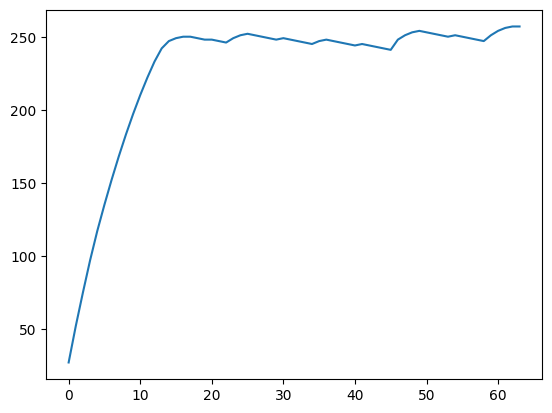

In [ ]:
solved, runs = brute_force(puzzle_hard.board)
plt.plot([i for i in range(len(runs))], runs)
plt.show()

0 1
solved
+-------+-------+-------+
| 2 7 8 | 4 6 1 | 5 9 3 |
| 6 4 9 | 7 5 3 | 2 1 8 |
| 1 3 5 | 8 9 2 | 4 6 7 |
+-------+-------+-------+
| 9 5 1 | 2 8 6 | 3 7 4 |
| 7 2 6 | 3 4 9 | 8 5 1 |
| 3 8 4 | 1 7 5 | 6 2 9 |
+-------+-------+-------+
| 5 1 7 | 6 3 4 | 9 8 2 |
| 8 6 3 | 9 2 7 | 1 4 5 |
| 4 9 2 | 5 1 8 | 7 3 6 |
+-------+-------+-------+



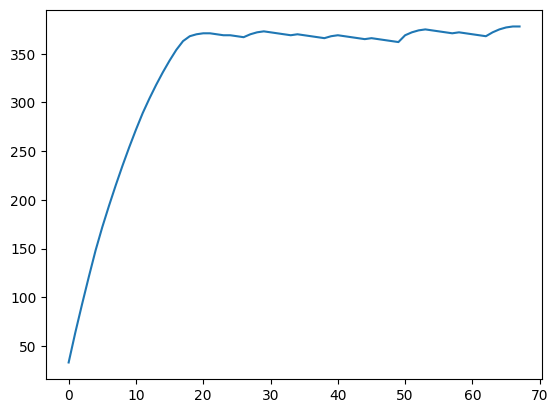

In [ ]:
solved, runs = brute_force(puzzle_veryhard.board)
plt.plot([i for i in range(len(runs))], runs)
plt.show()